In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import pytz
import os
import patsy #for spline regression
import scipy #for non-negative least square 
import scipy as sp 
from scipy import stats
from scipy.optimize import nnls
from numpy.linalg import inv #for matrix and statistics
import scipy as sp
import math
import statsmodels.api as sm
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import sklearn.cluster
import sklearn.linear_model
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
import sklearn.cluster
import sklearn.linear_model
from sklearn.svm import SVR
%matplotlib inline

In [33]:
#specify data source 

[region,zipcode]  = ['CAISO','92562']
#[region,zipcode] = ['PJM','08641']

In [34]:
mainDir = 'C:\Users\Admin\Dropbox\Active\EnergyProject\Thesis'
dataDir = mainDir + '/data/load/' + region +'/'

In [35]:
if region == 'CAISO':
    
    #timezone for local time adjustment
    localtz = 'US/Pacific'

    #specific to CAISO data
    TacName = 'Caiso_Totals'#'TAC_NORTH'
    
    datasource = 'raw/caiso_load_data_2013'
    
    d01 = pd.read_csv(dataDir + datasource + '/'+ '01.csv')
    d01 = d01[d01['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d02 = pd.read_csv(dataDir + datasource +'/'+ '02.csv')
    d02 = d02[d02['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d03 = pd.read_csv(dataDir + datasource +'/'+ '03.csv')
    d03 = d03[d03['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d04 = pd.read_csv(dataDir + datasource + '/'+ '04.csv')
    d04 = d04[d04['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d05 = pd.read_csv(dataDir + datasource + '/'+ '05.csv')
    d05 = d05[d05['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d06 = pd.read_csv(dataDir + datasource + '/'+ '06.csv')
    d06 = d06[d06['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d07 = pd.read_csv(dataDir + datasource + '/'+ '07.csv')
    d07 = d07[d07['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d08 = pd.read_csv(dataDir + datasource + '/'+ '08.csv')
    d08 = d08[d08['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d09 = pd.read_csv(dataDir + datasource + '/'+ '09.csv')
    d09 = d09[d09['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d10 = pd.read_csv(dataDir + datasource + '/'+ '10.csv')
    d10 = d10[d10['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d11 = pd.read_csv(dataDir + datasource + '/'+ '11.csv')
    d11 = d11[d11['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d12 = pd.read_csv(dataDir + datasource + '/'+ '12.csv')
    d12 = d12[d12['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    data = pd.concat([d01,d02,d03,d04,d05,d06,d07,d08,d09,d10,d11,d12])
    
    datasource = 'raw/caiso_load_data_2014'
    
    d01 = pd.read_csv(dataDir + datasource + '/'+ '01.csv')
    d01 = d01[d01['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d02 = pd.read_csv(dataDir + datasource + '/'+ '02.csv')
    d02 = d02[d02['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d03 = pd.read_csv(dataDir + datasource + '/'+ '03.csv')
    d03 = d03[d03['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d04 = pd.read_csv(dataDir + datasource + '/'+ '04.csv')
    d04 = d04[d04['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d05 = pd.read_csv(dataDir + datasource + '/'+ '05.csv')
    d05 = d05[d05['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d06 = pd.read_csv(dataDir + datasource + '/'+ '06.csv')
    d06 = d06[d06['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d07 = pd.read_csv(dataDir + datasource + '/'+ '07.csv')
    d07 = d07[d07['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d08 = pd.read_csv(dataDir + datasource + '/'+ '08.csv')
    d08 = d08[d08['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d09 = pd.read_csv(dataDir + datasource + '/'+ '09.csv')
    d09 = d09[d09['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d10 = pd.read_csv(dataDir + datasource + '/'+ '10.csv')
    d10 = d10[d10['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d11 = pd.read_csv(dataDir + datasource + '/'+ '11.csv')
    d11 = d11[d11['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    d12 = pd.read_csv(dataDir + datasource + '/'+ '12.csv')
    d12 = d12[d12['TAC_ZONE_NAME']==TacName].sort(columns='INTERVALSTARTTIME_GMT')
    data = pd.concat([data,d01,d02,d03,d04,d05,d06,d07,d08,d09,d10,d11,d12])

    data['tsLocal'] = data['INTERVALSTARTTIME_GMT'].map(lambda x: datetime.datetime.strptime(x[0:19],"%Y-%m-%dT%H:%M:%S").replace(tzinfo=pytz.utc)\
                                .astimezone(pytz.timezone(localtz)).strftime("%Y-%m-%d %H:%M:%S"))
    data['tsLocal'] = data['tsLocal'].map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

    data = data[['tsLocal','MW']].reset_index().drop(['index'],1)
    data.columns = ['tsLocal','load']
    #delete double readings (can happen due to daylight savings)
    data = data.groupby(['tsLocal']).mean().reset_index()
    

In [36]:
if region == 'PJM':
    
    datasource = 'raw'
    #filename = 'pjm_e_load_data_2012.csv'
    filename = '2013-PJM-hourly-loads.xls'
    data = pd.read_excel(dataDir + datasource + '/'+filename,sheetname='RTO')
    filename = '2014-PJM-hourly-loads.xls'
    d = pd.read_excel(dataDir + datasource + '/'+filename,sheetname='RTO')
    data = pd.concat([data,d])
    
    data = data.loc[:,data.columns[0:26]]
    #set DAY as index
    data = data.set_index('DATE')
    #remove unnecessary column 'peak'
    data = data.drop('COMP', 1)
    #unstack data and rename columns
    data = data.unstack().reset_index()
    data.columns = ['hour','date','load']

    #convert hour and date to timestamp then sort by tsLocal
    data['tsLocal'] = data['date'].map(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y"))+\
                    data['hour'].map(lambda x: datetime.timedelta(hours=int(str(x)[2:4])))
    data = data.sort(['tsLocal'])
    #don't need weekday for now
    #data['weekday'] = data['tsLocal'].map(lambda x: x.weekday())
    #reset index and drop uncesseary index
    data = data.reset_index()
    data = data.drop(['index','hour','date'], 1)

    #delete double readings (can happen due to daylight savings)
    data = data.groupby(['tsLocal']).mean().reset_index()

In [37]:
#weekday info
data['weekday'] = data['tsLocal'].map(lambda x: x.weekday())
#date and hour info
#add date and hour, normalized to 1
data['d'] = data.tsLocal.map(lambda x: x.timetuple().tm_yday)/365.0
data['h'] = data.tsLocal.map(lambda x: x.timetuple().tm_hour)/24.0
loaddata = data

## Weather data

In [38]:
#mainDir = 'C:/Users/umnouyp/Dropbox/Active/EnergyProject/Thesis/PVreadingsStudies/main'
#mainDir = 'C:/Users/Tee/Dropbox/Active/EnergyProject/Thesis/PVreadingsStudies/main'
mainDir = 'C:\Users\Admin\Dropbox\Active\EnergyProject\Thesis'
#we can choose which data to look at.
dataDir = mainDir + '/data/solar/' + datasource +'/' + zipcode +'/'
outputDir = mainDir + '/output/'+ datasource +'/' + zipcode +'/'

In [39]:
weatherdatasource = '/data/weather/weathersource/hourly/'
if (zipcode == '08641')|(zipcode =='08640'):
    weatherdata = pd.read_csv(mainDir+weatherdatasource+'08641_20132014.csv')
if (zipcode == '92562')|(zipcode =='92563'):
    weatherdata = pd.read_csv(mainDir+weatherdatasource+'92563_20132014.csv')

weatherdata['tsLocal'] = weatherdata.timestamp.map(lambda x: x[0:10] + " " + x[11:19])
#weatherdata.tsLocal = weatherdata.tsLocal.map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
if type(weatherdata.tsLocal[0])==str:
    weatherdata['tsLocal'] = weatherdata['tsLocal'].map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
weatherdata.drop(['timestamp','country','postal_code'], axis=1, inplace=True)

In [40]:
if weatherdata.shape[0]!=len(set(weatherdata['tsLocal'])):
    for i in range(weatherdata.shape[0]):
        if weatherdata.loc[i,'tsLocal'] == weatherdata.loc[(i+1),'tsLocal']:
            print weatherdata.loc[i,'tsLocal']

# Basic time series construction

In [41]:
#specify scope
StartScopeDate = '2013-01-01'
EndScopeDate = '2015-01-01'
StartScopeTime =  datetime.datetime.strptime(StartScopeDate,"%Y-%m-%d")
EndScopeTime =  datetime.datetime.strptime(EndScopeDate,"%Y-%m-%d")

#Generate data frame from start to end for time series
tslist = []
nxt = StartScopeTime
while nxt < EndScopeTime:
    tslist.append(nxt)
    nxt += datetime.timedelta(minutes=60) #hour data now
        
Scope = pd.DataFrame(0, index = np.arange(len(tslist)), columns = ['tsLocal'])
Scope['tsLocal'] = tslist

#Now we can merge using Scope Table as a backbone of data structure.
d = pd.merge(Scope,weatherdata,on=['tsLocal'], how = 'left') 



In [42]:
#there is no need to do interpolation

#Now we can merge our backbone + weather with solar data
d = pd.merge(d,loaddata,on=['tsLocal'], how = 'left') 

In [43]:
#weather
d['cldCvr-1'] = float('NaN')
d['dewPt-1'] = float('NaN')
d['feelsLike-1'] = float('NaN')
d['precip-1'] = float('NaN')
d['relHum-1'] = float('NaN')
d['sfcPres-1'] = float('NaN')
d['snowfall-1'] = float('NaN')
d['spcHum-1'] = float('NaN')
d['temp-1'] = float('NaN')
d['windSpd-1'] = float('NaN')
d['wetBulb-1'] = float('NaN')
d.loc[1:d.shape[0],'cldCvr-1'] = list(d['cldCvr'].iloc[0:(d.shape[0]-1)])
d.loc[1:d.shape[0],'dewPt-1'] = list(d['dewPt'].iloc[0:(d.shape[0]-1)])
d.loc[1:d.shape[0],'feelsLike-1'] = list(d['feelsLike'].iloc[0:(d.shape[0]-1)])
d.loc[1:d.shape[0],'precip-1'] = list(d['precip'].iloc[0:(d.shape[0]-1)])
d.loc[1:d.shape[0],'relHum-1'] = list(d['relHum'].iloc[0:(d.shape[0]-1)])
d.loc[1:d.shape[0],'sfcPres-1'] = list(d['sfcPres'].iloc[0:(d.shape[0]-1)])
d.loc[1:d.shape[0],'snowfall-1'] = list(d['snowfall'].iloc[0:(d.shape[0]-1)])
d.loc[1:d.shape[0],'spcHum-1'] = list(d['spcHum'].iloc[0:(d.shape[0]-1)])
d.loc[1:d.shape[0],'temp-1'] = list(d['temp'].iloc[0:(d.shape[0]-1)])
d.loc[1:d.shape[0],'windSpd-1'] = list(d['windSpd'].iloc[0:(d.shape[0]-1)])
d.loc[1:d.shape[0],'wetBulb-1'] = list(d['wetBulb'].iloc[0:(d.shape[0]-1)])

#normalize weather value
d['cldCvr-1'] = (d['cldCvr-1']-np.min(d['cldCvr-1']))/(np.max(d['cldCvr-1'])-np.min(d['cldCvr-1']))
d['dewPt-1'] = (d['dewPt-1']-np.min(d['dewPt-1']))/(np.max(d['dewPt-1'])-np.min(d['dewPt-1']))
d['feelsLike-1'] = (d['feelsLike-1']-np.min(d['feelsLike-1']))/(np.max(d['feelsLike-1'])-np.min(d['feelsLike-1']))
d['precip-1'] = (d['precip-1']-np.min(d['precip-1']))/(np.max(d['precip-1'])-np.min(d['precip-1']))
d['relHum-1'] = (d['relHum-1']-np.min(d['relHum-1']))/(np.max(d['relHum-1'])-np.min(d['relHum-1']))
d['sfcPres-1'] = (d['sfcPres-1']-np.min(d['sfcPres-1']))/(np.max(d['sfcPres-1'])-np.min(d['sfcPres-1']))
d['snowfall-1'] = (d['snowfall-1']-np.min(d['snowfall-1']))/(np.max(d['snowfall-1'])-np.min(d['snowfall-1']))
d['spcHum-1'] = (d['spcHum-1']-np.min(d['spcHum-1']))/(np.max(d['spcHum-1'])-np.min(d['spcHum-1']))
d['temp-1'] = (d['temp-1']-np.min(d['temp-1']))/(np.max(d['temp-1'])-np.min(d['temp-1']))
d['windSpd-1'] = (d['windSpd-1']-np.min(d['windSpd-1']))/(np.max(d['windSpd-1'])-np.min(d['windSpd-1']))
d['wetBulb-1'] = (d['wetBulb-1']-np.min(d['wetBulb-1']))/(np.max(d['wetBulb-1'])-np.min(d['wetBulb-1']))

In [44]:
#timeseries of previous timestamps
d['load-1d'] = float('NaN') #previous day
d['load-2d'] = float('NaN') #previous day
d['load-3d'] = float('NaN') #previous day
d['load-4d'] = float('NaN') #previous day
d['load-5d'] = float('NaN') #previous day
d['load-6d'] = float('NaN') #previous day
d['load-1w'] = float('NaN') #previous 7 days
d['load-1h'] = float('NaN') #previous hr
d['load-1d-1h'] = float('NaN')
d['load-1w-1h'] = float('NaN')
d['load-2h'] = float('NaN') #previous hr
d['load-1d-2h'] = float('NaN') #previous hr
d['load-1w-2h'] = float('NaN') #previous hr

#24 hour shift = 24 shift in index.

d.loc[24:d.shape[0],'load-1d'] = list(d['load'].iloc[0:(d.shape[0]-24)])
d.loc[(24*2):d.shape[0],'load-2d'] = list(d['load'].iloc[0:(d.shape[0]-(24*2))])
d.loc[(24*3):d.shape[0],'load-3d'] = list(d['load'].iloc[0:(d.shape[0]-(24*3))])
d.loc[(24*4):d.shape[0],'load-4d'] = list(d['load'].iloc[0:(d.shape[0]-(24*4))])
d.loc[(24*5):d.shape[0],'load-5d'] = list(d['load'].iloc[0:(d.shape[0]-(24*5))])
d.loc[(24*6):d.shape[0],'load-6d'] = list(d['load'].iloc[0:(d.shape[0]-(24*6))])
d.loc[(24*7):d.shape[0],'load-1w'] = list(d['load'].iloc[0:(d.shape[0]-(24*7))])

d.loc[1:d.shape[0],'load-1h'] = list(d['load'].iloc[0:(d.shape[0]-1)])
d.loc[25:d.shape[0],'load-1d-1h'] = list(d['load'].iloc[0:(d.shape[0]-25)])
d.loc[(24*7+1):d.shape[0],'load-1w-1h'] = list(d['load'].iloc[0:(d.shape[0]-(24*7+1))])
d.loc[2:d.shape[0],'load-2h'] = list(d['load'].iloc[0:(d.shape[0]-2)])
d.loc[26:d.shape[0],'load-1d-2h'] = list(d['load'].iloc[0:(d.shape[0]-26)])
d.loc[(24*7+2):d.shape[0],'load-1w-2h'] = list(d['load'].iloc[0:(d.shape[0]-(24*7+2))])


In [45]:
d[d['tsLocal'].map(lambda x: x.year==2013)].shape,d[d['tsLocal'].map(lambda x: x.year==2014)].shape

((8760, 40), (8760, 40))

In [46]:
#adjust date correctly
datetime.date(2013,1,1).weekday(),datetime.date(2014,1,1).weekday()

(1, 2)

In [47]:
d[d.tsLocal.map(lambda x: x.date() == datetime.date(2014,1,1))][:1]

,tsLocal,cldCvr,dewPt,feelsLike,precip,relHum,sfcPres,snowfall,spcHum,temp,...,load-4d,load-5d,load-6d,load-1w,load-1h,load-1d-1h,load-1w-1h,load-2h,load-1d-2h,load-1w-2h
8760,2014-01-01,11,23.7,42.6,0,41.7,967.4,0,2.8,45.7,...,21403.53,21063.63,20785.53,20715.54,22332.61,22441.14,22444.51,24081.69,24644.55,23559.06


In [48]:
d['load-1y'] = float('NaN')
#do one year shift. With weekday correction
d.loc[(8759):d.shape[0],'load-1y'] = list(d['load'].iloc[24:(d.shape[0]-(8759-24))])

Conclusion: to make a reference, use previous day first. For Monday and Saturday, use average of previous week and previous year with week alignment.

In [49]:
d['load_ref'] = d['load-1d']*((d['weekday']!=0)&(d['weekday']!=5))+\
                    d['load-1w']*(((d['weekday']==0)|(d['weekday']==5)))
                    #0.5*(d['load-1w']+d['load-1y'])*(((d['weekday']==0)|(d['weekday']==5)))

Add extra modification to make it smoother.

In [50]:
#ref... not use anymore 
#d['load_ref+1'] = float('NaN')
#d['load_ref-1'] = float('NaN')
#d.loc[1:d.shape[0],'load_ref-1'] = list(d['load_ref'].iloc[0:(d.shape[0]-1)])
#d.loc[0:(d.shape[0]-2),'load_ref+1'] = list(d['load_ref'].iloc[1:(d.shape[0])])
#d['load_ref'] = (d['load_ref']+d['load_ref-1']+d['load_ref+1'])/3.0

#for day
d['load-1d+1'] = float('NaN')
d['load-1d-1'] = float('NaN')
d.loc[1:d.shape[0],'load-1d-1'] = list(d['load-1d'].iloc[0:(d.shape[0]-1)])
d.loc[0:(d.shape[0]-2),'load-1d+1'] = list(d['load-1d'].iloc[1:(d.shape[0])])
d['load-1d_smooth'] = (d['load-1d']+d['load-1d-1']+d['load-1d+1'])/3.0

#for week
d['load-1w+1'] = float('NaN')
d['load-1w-1'] = float('NaN')
d.loc[1:d.shape[0],'load-1w-1'] = list(d['load-1w'].iloc[0:(d.shape[0]-1)])
d.loc[0:(d.shape[0]-2),'load-1w+1'] = list(d['load-1w'].iloc[1:(d.shape[0])])
d['load-1w_smooth'] = (d['load-1w']+d['load-1w-1']+d['load-1w+1'])/3.0

'''
#Define ratio r
d['r'] = d['load']/d['load_ref']
d['r-1'] = float('NaN')
d['r-2'] = float('NaN')
d['r-3'] = float('NaN')
d['r-4'] = float('NaN')
d['r-5'] = float('NaN')
d['r-6'] = float('NaN')
d.loc[1:d.shape[0],'r-1'] = list(d['r'].iloc[0:(d.shape[0]-1)])
d.loc[2:d.shape[0],'r-2'] = list(d['r'].iloc[0:(d.shape[0]-2)])
d.loc[3:d.shape[0],'r-3'] = list(d['r'].iloc[0:(d.shape[0]-3)])
d.loc[4:d.shape[0],'r-4'] = list(d['r'].iloc[0:(d.shape[0]-4)])
d.loc[5:d.shape[0],'r-5'] = list(d['r'].iloc[0:(d.shape[0]-5)])
d.loc[6:d.shape[0],'r-6'] = list(d['r'].iloc[0:(d.shape[0]-6)])
'''

#Define finer ratio
d['rd'] = d['load']/d['load-1d']
d['rw'] = d['load']/d['load-1w']
#d['ry'] = d['load']/d['load-1y']
d['rd-1'] = float('NaN')
d['rw-1'] = float('NaN')
#d['ry-1'] = float('NaN')
d['rd-2'] = float('NaN')
d['rw-2'] = float('NaN')
#d['ry-2'] = float('NaN')
d.loc[1:d.shape[0],'rd-1'] = list(d['rd'].iloc[0:(d.shape[0]-1)])
d.loc[1:d.shape[0],'rw-1'] = list(d['rw'].iloc[0:(d.shape[0]-1)])
#d.loc[1:d.shape[0],'ry-1'] = list(d['ry'].iloc[0:(d.shape[0]-1)])
d.loc[2:d.shape[0],'rd-2'] = list(d['rd'].iloc[0:(d.shape[0]-2)])
d.loc[2:d.shape[0],'rw-2'] = list(d['rw'].iloc[0:(d.shape[0]-2)])
#d.loc[2:d.shape[0],'ry-2'] = list(d['ry'].iloc[0:(d.shape[0]-2)])

#feed this back to data
Data = d

#1-hr rolling prediction

In [51]:
d = Data
#Truly random
#l = np.random.permutation(d.shape[0])
#d = d.iloc[l].reset_index(drop=True)
#offset = int(d.shape[0] * 0.8)

#Assign specific period
StartDate = datetime.date(2014,10,1)
offset = d[d.tsLocal.map(lambda x: x.date()) <StartDate].shape[0]

Data_train = d[:offset]
Data_test = d[offset:]

In [52]:
np.max(Data_test['load']), np.mean(Data_test['load'])

(37923.410000000003, 24614.512610960144)

Actually, there is no ensemble here. We just need a single model.

## Complex model: GBR

In [53]:
#Gradient Boosting Regression
###############################################################################
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'lad'}
mod = ensemble.GradientBoostingRegressor(**params)

### Online Scheme 1

In [54]:
Data['load_predict'] = float('NaN')

In [55]:
DateOfInterest = StartDate 

while DateOfInterest < EndScopeTime.date():
    '''
    if zipcode == '92562':
        feature_names = ['rw-1','d','h']
    if zipcode == '08641':
    '''
    feature_names = ['rw-1','rw-2','d','h']
    #d_imm = Data.loc[Data[Data.tsLocal.map(lambda x: ((x.weekday()==DateOfInterest.weekday())))].index,
    d_imm = Data.loc[:,
              ['tsLocal','load','load_ref','load-1w','load-1d','rw','rd']+feature_names].dropna()
    d = d_imm[d_imm['tsLocal'].map(lambda x: x.date()<DateOfInterest)]
    X_train, y_train = d.loc[:,feature_names], d.loc[:,'rw']
    d = d_imm[d_imm['tsLocal'].map(lambda x: x.date()==DateOfInterest)]
    X_test, y_test = d.loc[:,feature_names], d.loc[:,'rw']

    mod.fit(X_train, y_train)
    d.loc[:,'load_predict_w'] = (mod.predict(X_test))*d.loc[:,'load-1w']
    Data.loc[d.index,'load_predict_w'] =d['load_predict_w']

    '''
    if zipcode == '92562':
        feature_names = ['rd-1','d','h']
    if zipcode == '08641':
    '''
    feature_names = ['rd-1','rd-2','d','h']
    #d_imm = Data.loc[Data[Data.tsLocal.map(lambda x: ((x.weekday()==DateOfInterest.weekday())))].index,
    d_imm = Data.loc[:,
              ['tsLocal','load','load_ref','load-1w','load-1d','rw','rd']+feature_names].dropna()
    d = d_imm[d_imm['tsLocal'].map(lambda x: x.date()<DateOfInterest)]
    X_train, y_train = d.loc[:,feature_names], d.loc[:,'rd']
    d = d_imm[d_imm['tsLocal'].map(lambda x: x.date()==DateOfInterest)]
    X_test, y_test = d.loc[:,feature_names], d.loc[:,'rd']

    mod.fit(X_train, y_train)
    d.loc[:,'load_predict_d'] = (mod.predict(X_test))*d.loc[:,'load-1d']
    Data.loc[d.index,'load_predict_d'] =d['load_predict_d']

    DateOfInterest = DateOfInterest + datetime.timedelta(days=1)

In [56]:
Data.loc[offset:,'load_predict'] = 0.5*(Data.loc[offset:,'load_predict_w']+Data.loc[offset:,'load_predict_d'])
l = Data.loc[offset:,'load']-Data.loc[offset:,'load_predict']
[mean_scheme1,max_scheme1] = [np.mean(np.absolute(l)),np.max(np.absolute(l))]
print [mean_scheme1,max_scheme1]

[180.19587030558375, 1289.3067979723564]


In [57]:
#Closer look at error relative to the MEAN of TEST DATA
d = Data[['tsLocal','load_predict','load','load_ref','load-1d','load-1w','weekday']]
d['prediction-difference'] = (d['load_predict']-d['load'])/np.mean(Data_test['load'].dropna())
np.mean(np.absolute(d['prediction-difference'])),np.max(np.absolute(d['prediction-difference']))
d[(d['prediction-difference']>0.05)|(d['prediction-difference']<-0.05)][['tsLocal','prediction-difference','weekday']]

C:\Users\Admin\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,tsLocal,prediction-difference,weekday
15672,2014-10-16,-0.05238,3


In [58]:
Data['load_predict_final'] = Data['load_predict'] 

In [59]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)

-3.1166935249 239.308026675
(-0.77723095941854314, 180.19379926218926)


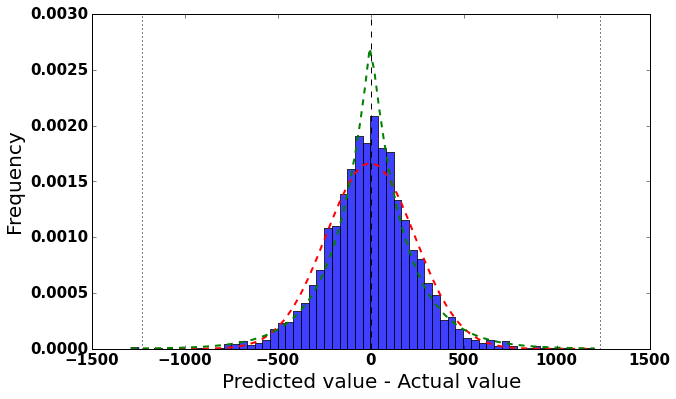

In [60]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats

fig = plt.figure(figsize=(10,6))
ax1  = fig.add_subplot(111)
#Overall distribution

l = list((Data['load_predict_final']-Data['load']).dropna())


# the histogram of the data
n, bins, patches = ax1.hist(l, 60, normed=1, alpha=0.75)

# best fit of data with normal distribution
(mu, sigma) = norm.fit(l)
print mu, sigma

plt.xlabel("Predicted value - Actual value")
plt.ylabel("Frequency")


# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
ax1.plot(bins, y, 'r--', linewidth=2)




laplace = stats.laplace

# fit
param = laplace.fit(l)
x = np.linspace(np.min(l), np.max(l), 100)
pdf_fitted = laplace.pdf(x, *param)
plt.plot(x, pdf_fitted, 'g--', linewidth=2)

print  param

plt.axvline(x=0.05*np.mean(Data_test['load'].dropna()), color='k',linestyle=':')
plt.axvline(x=0*np.mean(Data_test['load'].dropna()), color='k',linestyle='--')
plt.axvline(x=-0.05*np.mean(Data_test['load'].dropna()), color='k',linestyle=':')


In [61]:
[len(l), np.mean(np.absolute(l)), np.max(np.absolute(l)), np.mean(Data_test['load'].dropna()), 
np.mean(np.absolute(l))/np.mean(Data_test['load'].dropna()), np.max(np.absolute(l))/np.mean(Data_test['load'].dropna())]

[2208,
 180.19587030558375,
 1289.3067979723564,
 24614.512610960144,
 0.0073207165688646478,
 0.052379944236566549]

In [62]:
mainDir = 'C:\Users\Admin\Dropbox\Active\EnergyProject\Thesis'
dataDir = mainDir + '/data/load/' + region +'/'
Data.to_csv(dataDir +'/load_with_full_forecast.csv',index=False)